In [57]:
#"D:\B.tech{CS-DS}\Semister 6\PA\Datasets\green_tripdata_2024-08.parquet"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
nycgreen=pd.read_parquet(r"D:\B.tech{CS-DS}\Semister 6\PA\Datasets\green_tripdata_2024-08.parquet")

In [59]:
nycgreen.info()

# Drop Variable ehail fee (complete Zero null)
# Missing Values in both object & float
# Datetime Variables are in Date Format. Trip Duration in Minutes/Seconds & Extract
# weekday(Mon-Sun), hour(0-23), end/start time period, holidays,seasons, etc.
# from Date Variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51771 entries, 0 to 51770
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               51771 non-null  int32         
 1   lpep_pickup_datetime   51771 non-null  datetime64[us]
 2   lpep_dropoff_datetime  51771 non-null  datetime64[us]
 3   store_and_fwd_flag     50187 non-null  object        
 4   RatecodeID             50187 non-null  float64       
 5   PULocationID           51771 non-null  int32         
 6   DOLocationID           51771 non-null  int32         
 7   passenger_count        50187 non-null  float64       
 8   trip_distance          51771 non-null  float64       
 9   fare_amount            51771 non-null  float64       
 10  extra                  51771 non-null  float64       
 11  mta_tax                51771 non-null  float64       
 12  tip_amount             51771 non-null  float64       
 13  t

In [60]:
nycgreen=nycgreen.drop("ehail_fee",axis=1) # Drop email fee

In [61]:
# Create New variable "trip_duration"
nycgreen["trip_duration"]=nycgreen.lpep_dropoff_datetime-nycgreen.lpep_pickup_datetime

In [62]:
nycgreen.trip_duration.head(2)

0   0 days 00:19:20
1   0 days 00:05:52
Name: trip_duration, dtype: timedelta64[us]

In [63]:
# Convert timedelta into minutes
nycgreen["trip_duration"]=nycgreen["trip_duration"].dt.total_seconds()/60

In [64]:
# Create a new variable week day or day of week 
nycgreen["weekday"]=nycgreen["lpep_dropoff_datetime"].dt.day_name()

In [65]:
nycgreen["weekday"].value_counts(dropna=False)

weekday
Thursday     9117
Friday       8629
Saturday     7261
Tuesday      7083
Wednesday    7073
Monday       6873
Sunday       5735
Name: count, dtype: int64

In [66]:
# Create new variable "hour" based on time variable
nycgreen["hour"]=nycgreen["lpep_dropoff_datetime"].dt.hour

In [67]:
nycgreen["hour"].value_counts(dropna=False)

hour
18    4198
17    4080
16    3874
19    3583
15    3531
14    3178
12    2726
13    2656
20    2646
10    2594
11    2507
9     2454
21    2345
8     2080
22    2013
23    1693
7     1458
0     1219
1      796
6      616
2      564
3      350
4      320
5      290
Name: count, dtype: int64

In [68]:
# Split Data into obj & num cols
objcols=nycgreen[['VendorID','store_and_fwd_flag', 'RatecodeID', 'PULocationID', 
                  'DOLocationID','payment_type', 'trip_type','weekday', 'hour']]
numcols=nycgreen.drop(columns=objcols)

In [69]:
# Drop Datetime variables
numcols=numcols.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime'],axis=1)

In [70]:
# Check for missing values in objcols using value_counts(dropna=False)
pd.set_option("display.max_rows",None)
for col in objcols.columns:
    freq=objcols[col].value_counts(dropna=False)
    print(freq)
# Missing Vaules in store_and_fwd_flag,RatecodeID, payment_type, trip_type
# LocationID's have too many levels(>100 levels/classes) - Encoding Issue

VendorID
2    45657
1     6114
Name: count, dtype: int64
store_and_fwd_flag
N       49932
None     1584
Y         255
Name: count, dtype: int64
RatecodeID
1.0     46649
5.0      3245
NaN      1584
2.0       162
4.0        84
3.0        40
99.0        5
6.0         2
Name: count, dtype: int64
PULocationID
74     11556
75      6794
43      2650
82      2448
95      2394
41      2135
166     2115
93      1916
97      1521
65      1436
130     1274
244     1119
66      1105
42      1025
260      844
129      806
7        753
134      575
92       530
33       512
83       422
80       372
193      343
223      312
116      310
195      275
24       258
236      248
247      232
25       229
255      225
55       220
196      203
152      193
210      183
181      161
145      141
226      137
264      115
243      115
61       111
112      109
186      104
256      103
253       96
179       94
157       90
49        83
146       81
17        73
119       72
52        57
168       56
36   

In [71]:
# impute missing values in objcols with most_frequent class/level
import warnings
warnings.filterwarnings("ignore")
for col in objcols.columns:
    objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())

In [72]:
numcols.isnull().sum() # Mean or Median Imputation

passenger_count          1584
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     1584
trip_duration               0
dtype: int64

In [73]:
# Median Imputation
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())

In [74]:
numcols.isnull().sum() # Mean or Median Imputation

passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
trip_duration            0
dtype: int64

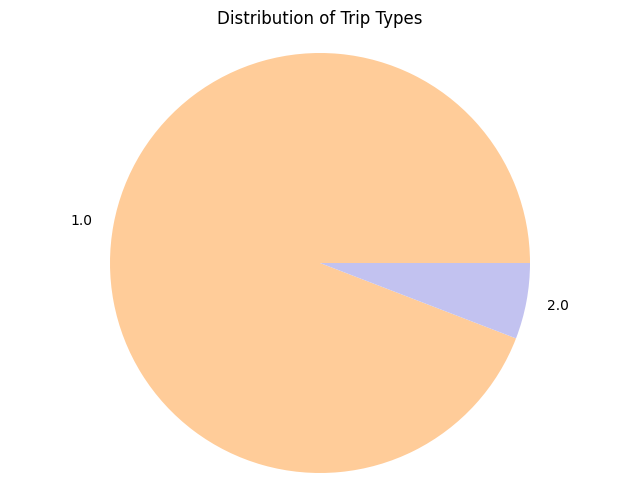

In [75]:
trip_counts = objcols['trip_type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(trip_counts, 
        labels=trip_counts.index, 
        colors=['#ffcc99','#c2c2f0'],
        )
plt.title('Distribution of Trip Types')
plt.axis('equal')
plt.show()

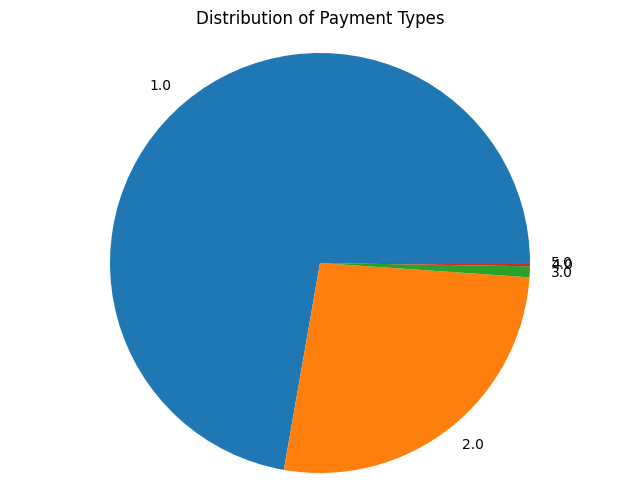

In [76]:
payment = objcols['payment_type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(payment, 
        labels=payment.index)
plt.title('Distribution of Payment Types')
plt.axis('equal')
plt.show()

In [77]:
weekday_avg_total = nycgreen.groupby('weekday')['total_amount'].mean().reset_index()
print(weekday_avg_total)

     weekday  total_amount
0     Friday     25.238029
1     Monday     25.733412
2   Saturday     26.984933
3     Sunday     26.114284
4   Thursday     25.433071
5    Tuesday     25.914437
6  Wednesday     26.613642


In [78]:
# i) Groupby average total_amount by payment_type
# First, let's see what payment types exist
print(nycgreen['payment_type'].value_counts())

# Group by payment_type and calculate average total_amount
# Note: You might want to map payment_type codes to meaningful names
payment_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
}

payment_avg_total = nycgreen.groupby('payment_type')['total_amount'].mean().reset_index()
payment_avg_total['payment_name'] = payment_avg_total['payment_type'].map(payment_map)
print(payment_avg_total)

payment_type
1.0    35819
2.0    13804
3.0      435
4.0      126
5.0        3
Name: count, dtype: int64
   payment_type  total_amount payment_name
0           1.0     27.466372  Credit Card
1           2.0     22.148655         Cash
2           3.0      5.919011    No Charge
3           4.0      2.535635      Dispute
4           5.0     29.166667      Unknown


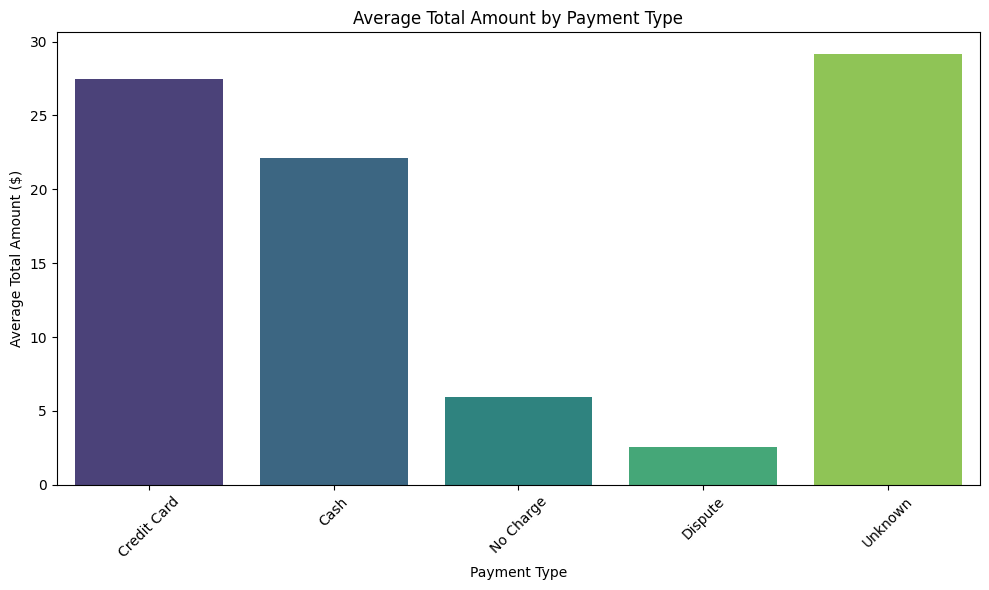

In [79]:
# Assuming payment_avg_total is already defined and contains 'payment_name' and 'total_amount'
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_avg_total, x='payment_name', y='total_amount', palette='viridis')

plt.title('Average Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Total Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [80]:
# Group by weekday and calculate average tip_amount
weekday_avg_tip = nycgreen.groupby('weekday')['tip_amount'].mean().reset_index()

# Optional: Sort by weekday order
weekday_avg_tip['weekday'] = pd.Categorical(weekday_avg_tip['weekday'], ordered=True)
weekday_avg_tip = weekday_avg_tip.sort_values('weekday')
print(weekday_avg_tip)

     weekday  tip_amount
0     Friday    2.603152
1     Monday    2.691179
2   Saturday    2.818437
3     Sunday    2.874863
4   Thursday    2.768791
5    Tuesday    2.759279
6  Wednesday    2.868698


In [81]:
# Encode categorical variables
nycgreen['store_and_fwd_flag'] = nycgreen['store_and_fwd_flag'].map({'Y': 1, 'N': 0})
nycgreen['weekday'] = nycgreen['weekday'].map({
    "Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3,
    "Friday": 4, "Saturday": 5, "Sunday": 6
})

In [82]:
# Group by payment_type and calculate average tip_amount
payment_avg_tip = nycgreen.groupby('payment_type')['tip_amount'].mean().reset_index()
payment_avg_tip['payment_name'] = payment_avg_tip['payment_type'].map(payment_map)
print(payment_avg_tip)

   payment_type  tip_amount payment_name
0           1.0    3.817659  Credit Card
1           2.0    0.000000         Cash
2           3.0    0.000000    No Charge
3           4.0    0.049206      Dispute
4           5.0    0.000000      Unknown


In [83]:
# l)	Test null average total_amount of different trip_type is identical
from scipy.stats import f_oneway

# Drop rows with missing trip_type
df_clean = nycgreen.dropna(subset=['trip_type'])

# Get list of total_amount arrays for each trip_type group
groups = [group['total_amount'].values for name, group in df_clean.groupby('trip_type')]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject null hypothesis: Average total_amount differs by trip_type")
else:
    print("Fail to reject null hypothesis: No evidence of difference in average total_amount by trip_type")

ANOVA Results:
F-statistic: 5470.3030
P-value: 0.0000
Reject null hypothesis: Average total_amount differs by trip_type


In [84]:
numcols.columns

Index(['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'trip_duration'],
      dtype='object')

In [85]:
objcols=objcols.drop(['PULocationID','DOLocationID','VendorID'],axis=1)

In [86]:
import seaborn as sns

Correlation Matrix:
                       passenger_count  trip_distance  fare_amount     extra  \
passenger_count               1.000000      -0.004287     0.034167  0.021083   
trip_distance                -0.004287       1.000000     0.005660 -0.008715   
fare_amount                   0.034167       0.005660     1.000000 -0.022105   
extra                         0.021083      -0.008715    -0.022105  1.000000   
mta_tax                      -0.073625      -0.020657    -0.136458  0.199244   
tip_amount                    0.020993       0.000190     0.374252  0.089511   
tolls_amount                  0.009070       0.004091     0.339585  0.075548   
improvement_surcharge         0.009623      -0.015534     0.040403  0.070506   
total_amount                  0.036849       0.004376     0.976856  0.062011   
congestion_surcharge          0.014832      -0.008031     0.083876  0.036093   
trip_duration                -0.001663       0.001703     0.168693 -0.003312   

                   

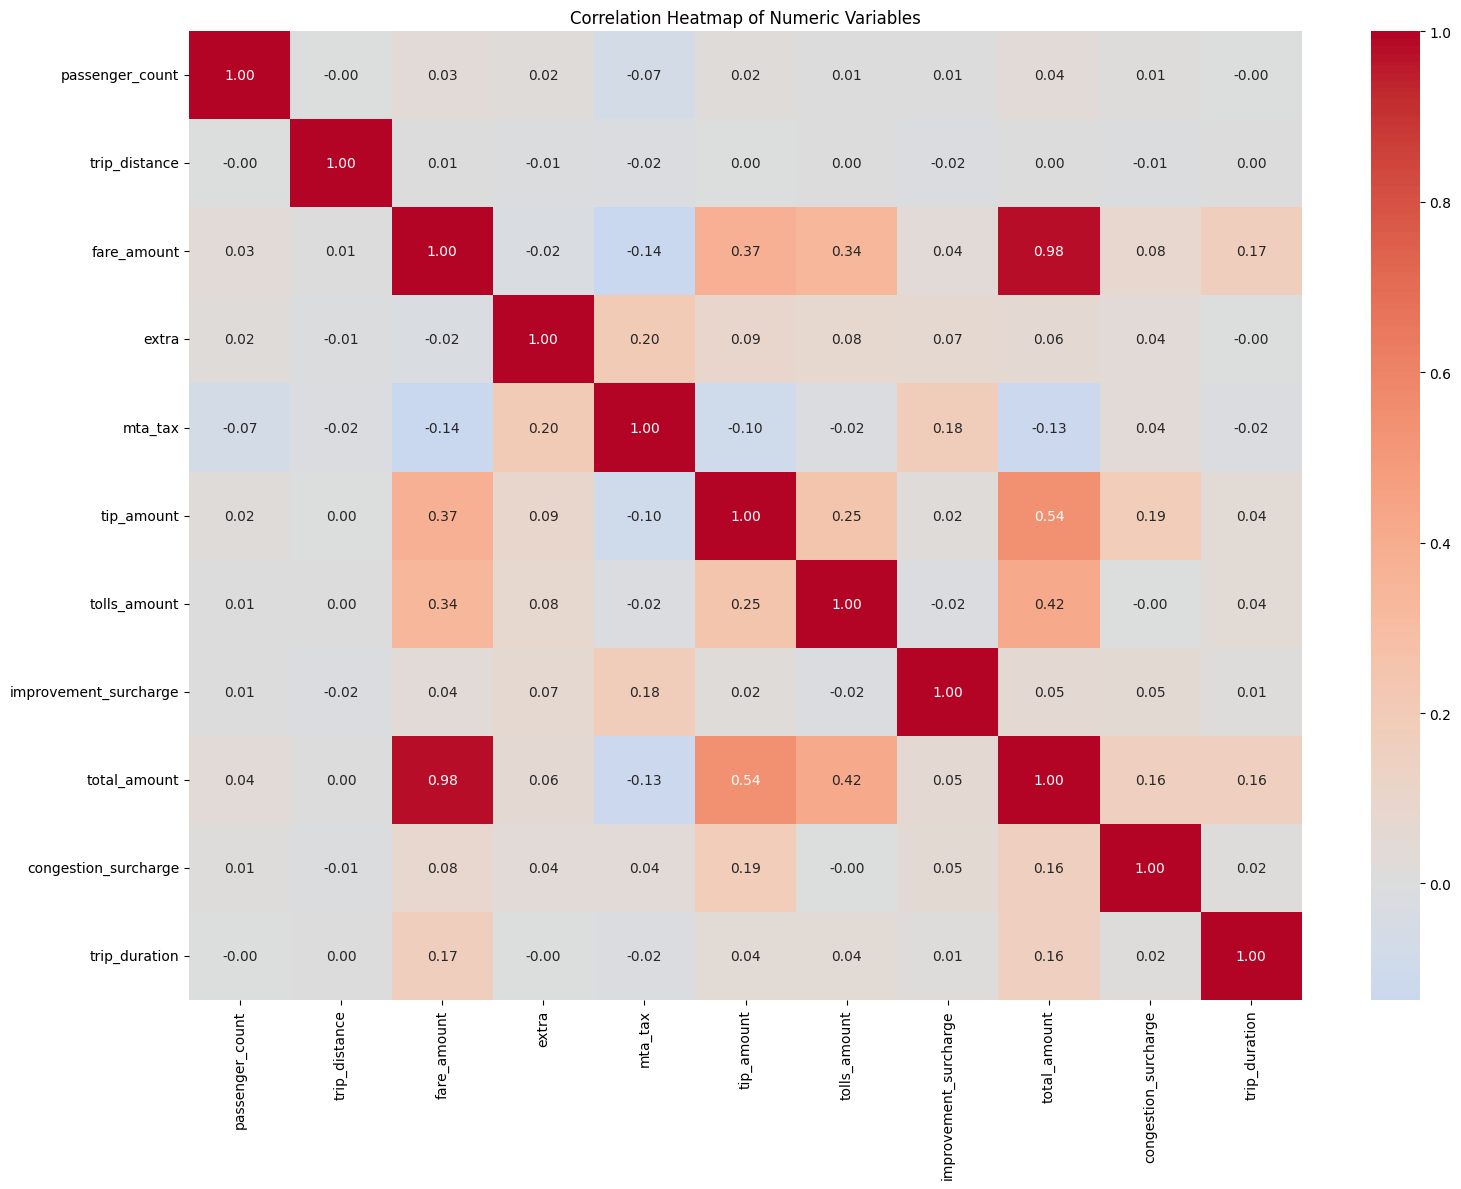


Strong Correlations (|r| > 0.5):
total_amount  fare_amount     0.976856
fare_amount   total_amount    0.976856
tip_amount    total_amount    0.538854
total_amount  tip_amount      0.538854
dtype: float64


In [87]:
# Create correlation matrix
corr_matrix = numcols.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Visualize with heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()

# Get strong correlations (absolute value > 0.5)
strong_correlations = corr_matrix.unstack().sort_values(ascending=False)
strong_correlations = strong_correlations[abs(strong_correlations) > 0.5]
strong_correlations = strong_correlations[strong_correlations < 1]  # Remove self-correlations

print("\nStrong Correlations (|r| > 0.5):")
print(strong_correlations)

In [88]:
objcols_dummy=pd.get_dummies(objcols)

In [89]:
objcols_dummy.shape

(51771, 13)

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
objcols_labelencode=objcols.apply(LabelEncoder().fit_transform)

In [92]:
objcols_labelencode.shape

(51771, 6)

In [93]:
from sklearn.preprocessing import StandardScaler
# Scale Numeric Variables
numcols_scaled=StandardScaler().fit_transform(numcols)

In [94]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [95]:
# Concat numcols and objcols
nycgreen_final=pd.concat([numcols_scaled,objcols_labelencode],axis=1)

In [96]:
# Split into y & X
y=nycgreen_final['total_amount']
X=nycgreen_final.drop(['fare_amount','total_amount'],axis=1)

<Figure size 4000x2000 with 0 Axes>

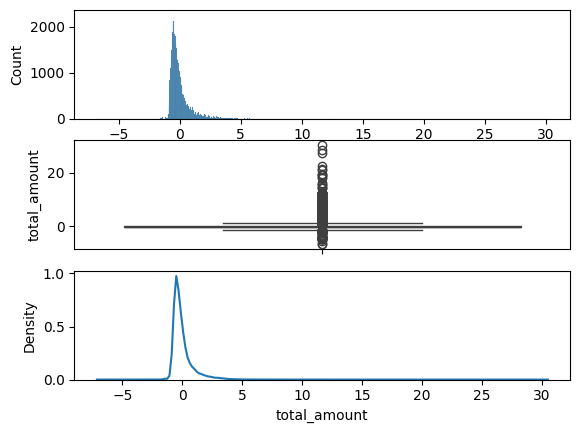

In [97]:
import seaborn as sns
plt.figure(figsize=(40,20))
fig,ax=plt.subplots(3,1)
sns.histplot(nycgreen_final['total_amount'],ax=ax[0])
sns.boxplot(nycgreen_final['total_amount'],ax=ax[1])
sns.kdeplot(nycgreen_final['total_amount'],ax=ax[2])
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split into y & X
y=nycgreen_final['total_amount']
X=nycgreen_final.drop(['fare_amount','total_amount'],axis=1)

In [102]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51771 entries, 0 to 51770
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_count        51771 non-null  float64
 1   trip_distance          51771 non-null  float64
 2   extra                  51771 non-null  float64
 3   mta_tax                51771 non-null  float64
 4   tip_amount             51771 non-null  float64
 5   tolls_amount           51771 non-null  float64
 6   improvement_surcharge  51771 non-null  float64
 7   congestion_surcharge   51771 non-null  float64
 8   trip_duration          51771 non-null  float64
 9   store_and_fwd_flag     51771 non-null  int32  
 10  RatecodeID             51771 non-null  int64  
 11  payment_type           51771 non-null  int64  
 12  trip_type              51771 non-null  int64  
 13  weekday                51771 non-null  int32  
 14  hour                   51771 non-null  int64  
dtypes:


Scaler saved to scaler.pkl

📊 Linear Regression Performance:
Train RMSE: 0.7199
Test RMSE: 0.7202
Train R²: 0.4832
Test R²: 0.4756
Test MAE: 0.3759
✅ Model saved to linear_regression.pkl

📊 Decision Tree Performance:
Train RMSE: 0.0139
Test RMSE: 0.5283
Train R²: 0.9998
Test R²: 0.7178
Test MAE: 0.1073
✅ Model saved to decision_tree.pkl

📊 Random Forest Performance:
Train RMSE: 0.1524
Test RMSE: 0.3956
Train R²: 0.9768
Test R²: 0.8418
Test MAE: 0.0851
✅ Model saved to random_forest.pkl

📊 Gradient Boosting Performance:
Train RMSE: 0.3506
Test RMSE: 0.4172
Train R²: 0.8774
Test R²: 0.8240
Test MAE: 0.1229
✅ Model saved to gradient_boosting.pkl


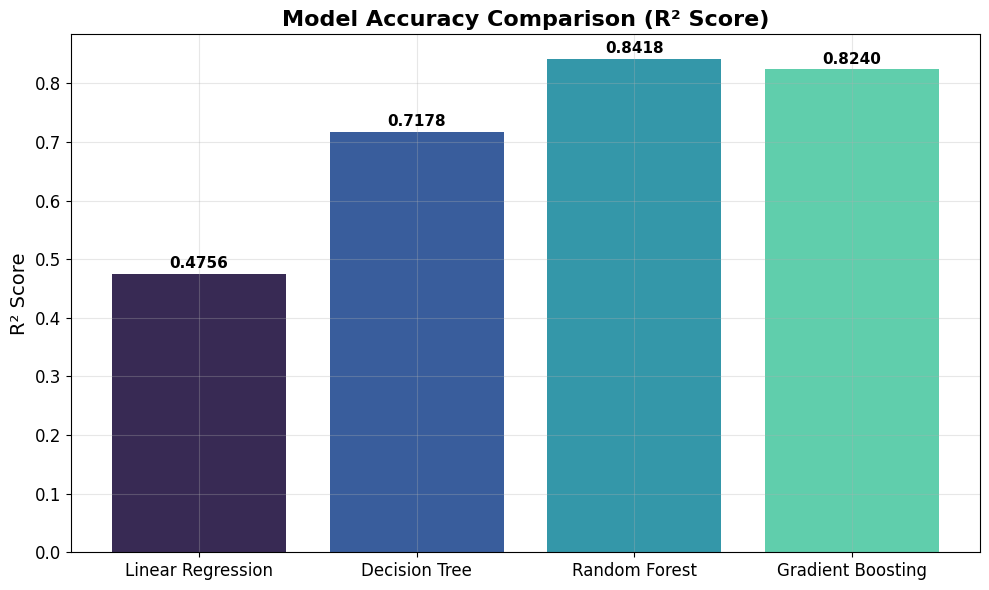

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

# Assuming X and y are already defined
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
print("\nScaler saved to scaler.pkl")

# Function to evaluate and print model metrics
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, save_pkl=False):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    print(f"\n📊 {model_name} Performance:")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

    if save_pkl:
        with open(f"{model_name.lower().replace(' ', '_')}.pkl", 'wb') as file:
            pickle.dump(model, file)
        print(f"✅ Model saved to {model_name.lower().replace(' ', '_')}.pkl")

    return model, test_rmse, test_r2, test_mae

# Evaluate models
lr_model, lr_rmse, lr_r2, lr_mae = evaluate_model(
    LinearRegression(), X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression", save_pkl=True)

dt_model, dt_rmse, dt_r2, dt_mae = evaluate_model(
    DecisionTreeRegressor(random_state=42), X_train, X_test, y_train, y_test, "Decision Tree", save_pkl=True)

rf_model, rf_rmse, rf_r2, rf_mae = evaluate_model(
    RandomForestRegressor(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test, "Random Forest", save_pkl=True)

gb_model, gb_rmse, gb_r2, gb_mae = evaluate_model(
    GradientBoostingRegressor(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test, "Gradient Boosting", save_pkl=True)

# Model comparison
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
rmse_scores = [lr_rmse, dt_rmse, rf_rmse, gb_rmse]
r2_scores = [lr_r2, dt_r2, rf_r2, gb_r2]
mae_scores = [lr_mae, dt_mae, rf_mae, gb_mae]

# Bar plot for accuracy (R²)
plt.figure(figsize=(10, 6))
bars = plt.bar(models, r2_scores, color=sns.color_palette('mako', len(models)))
plt.title('Model Accuracy Comparison (R² Score)', fontsize=16, fontweight='bold')
plt.ylabel('R² Score', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{score:.4f}',
             ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('r2_accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [112]:
from sklearn.linear_model import LinearRegression

In [107]:
model=LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
model.score(X,y)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree=DecisionTreeRegressor(max_depth=6).fit(X,y)

In [ ]:
tree.score(X,y)

0.8233375814761971

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(tree,X,y)

array([0.67597181, 0.77207357, 0.73988377, 0.83591264, 0.74554372])

In [ ]:
np.mean([0.67597181, 0.77095276, 0.73988377, 0.83591264, 0.75504746])

0.755553688

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF=RandomForestRegressor(n_estimators=500).fit(X,y)

In [ ]:
RF.score(X,y)

0.978693852025547

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X,y)
'''# Evaluate
y_pred = gb.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.4f}")'''

'# Evaluate\ny_pred = gb.predict(X_test)\nprint(f"R² Score: {r2_score(y_test, y_pred):.4f}")\nprint(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.4f}")'

In [ ]:
gb.score(X,y)

0.8700828572989872

In [ ]:
import random

n_samples = random.randint(30, 50)

random_indices = np.random.choice(len(X_test), size=n_samples, replace=False)

X_sample = X_test.iloc[random_indices]
y_sample = y_test.iloc[random_indices]

new_pred = RF.predict(X_sample)
new_pred = np.round(new_pred,2)

for pred, actual in zip(new_pred, y_sample):
    print(f"Predicted: {pred}, Actual: {actual}")

Predicted: 1.41, Actual: 1.4737001571051005
Predicted: -0.06, Actual: -0.057806948805241794
Predicted: -0.41, Actual: -0.4071292312328474
Predicted: 0.2, Actual: 0.19507394012771961
Predicted: -0.75, Actual: -0.7484517667346302
Predicted: 1.9, Actual: 2.0527929484577347
Predicted: -0.22, Actual: -0.26046720425942516
Predicted: 0.83, Actual: 0.859052934971031
Predicted: 0.05, Actual: 0.05107849546290497
Predicted: 0.95, Actual: 0.9408281257683332
Predicted: 0.0, Actual: -0.009364036865535674
Predicted: -0.92, Actual: -0.922668477563665
Predicted: -0.34, Actual: -0.3315760658222966
Predicted: 1.77, Actual: 1.759913324895658
Predicted: 0.39, Actual: 0.39017887904084797
Predicted: -0.58, Actual: -0.5777904989837387
Predicted: -0.24, Actual: -0.2418011280991715
Predicted: -0.51, Actual: -0.4982374601102764
Predicted: -0.72, Actual: -0.7048975890273713
Predicted: -0.52, Actual: -0.5244588528115852
Predicted: -0.71, Actual: -0.7048975890273713
Predicted: -0.56, Actual: -0.5671241697493081
Pre

In [ ]:
import pickle
with open('best_model_RF.pkl', 'wb') as file:
    pickle.dump(RF, file)